In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#own
from Floyd import Floyd
# from utils import *
import utils

# load data

In [3]:
vehicle_types = ['A', 'B', 'C']
vehicle_type_to_idx = {'A':0, 'B':1, 'C':2}

In [4]:
vehicle_names = []
for t in vehicle_types:
    num = 3
    if t == 'C':
        num = 6
    for i in range(num):
        tmp = str(i+1).zfill(2)
        vehicle_names.append(t + tmp)
               
for t in vehicle_types:
    num = 3
    if t == 'C':
        num = 6
    for i in range(num, 2*num):
        tmp = str(i+1).zfill(2)
        vehicle_names.append(t + tmp)
        
print(vehicle_names)
vehicle_name_to_idx = {name: idx for idx, name in enumerate(vehicle_names)}
print(vehicle_name_to_idx)

['A01', 'A02', 'A03', 'B01', 'B02', 'B03', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'A04', 'A05', 'A06', 'B04', 'B05', 'B06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12']
{'A01': 0, 'A02': 1, 'A03': 2, 'B01': 3, 'B02': 4, 'B03': 5, 'C01': 6, 'C02': 7, 'C03': 8, 'C04': 9, 'C05': 10, 'C06': 11, 'A04': 12, 'A05': 13, 'A06': 14, 'B04': 15, 'B05': 16, 'B06': 17, 'C07': 18, 'C08': 19, 'C09': 20, 'C10': 21, 'C11': 22, 'C12': 23}


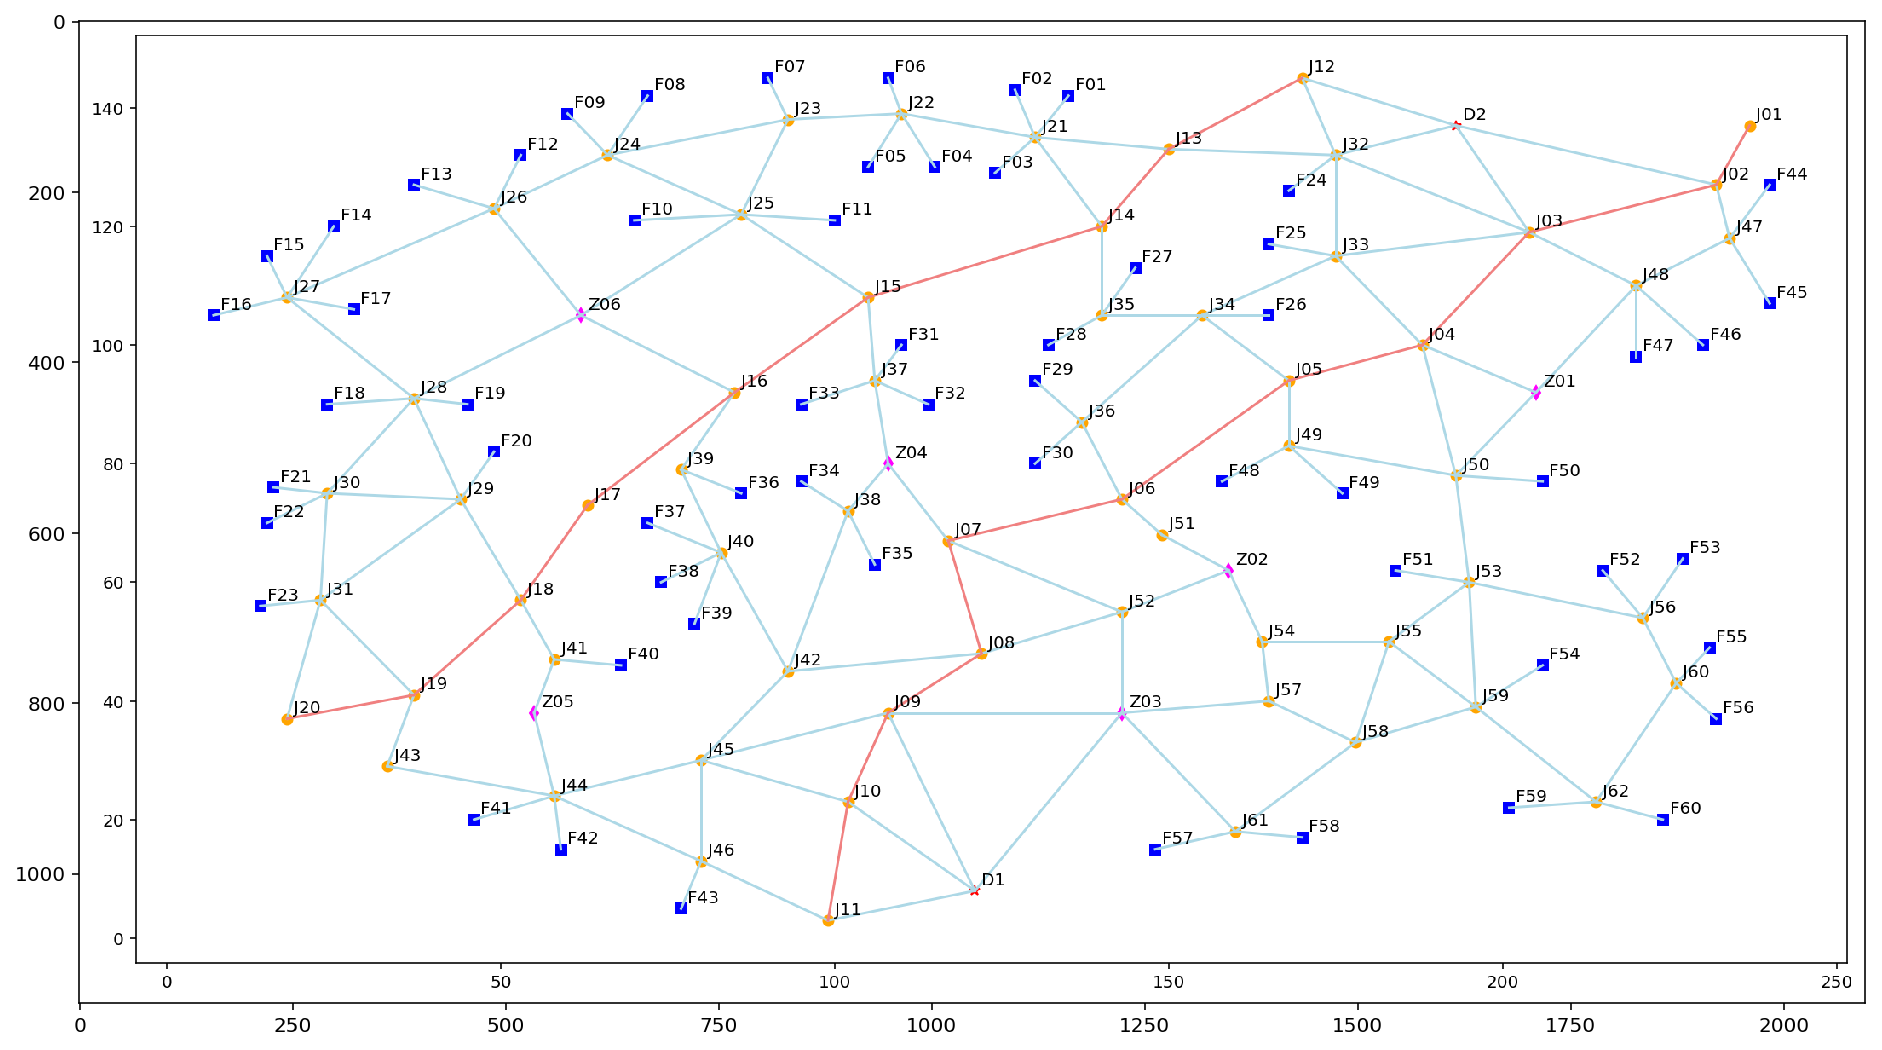

In [5]:
import matplotlib.image as mpimg
img=mpimg.imread('img/node_distribution.png')
plt.figure(figsize=(16,10))
plt.imshow(img)


In [6]:
import pickle
data_load = pickle.load(open('data.p', 'rb'))
data_load

{'connection_array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]]),
 'coord_dict': {'D1': (121, 8),
  'D2': (193, 137),
  'F01': (135, 142),
  'F02': (127, 143),
  'F03': (124, 129),
  'F04': (115, 130),
  'F05': (105, 130),
  'F06': (108, 145),
  'F07': (90, 145),
  'F08': (72, 142),
  'F09': (60, 139),
  'F10': (70, 121),
  'F11': (100, 121),
  'F12': (53, 132),
  'F13': (37, 127),
  'F14': (25, 120),
  'F15': (15, 115),
  'F16': (7, 105),
  'F17': (28, 106),
  'F18': (24, 90),
  'F19': (45, 90),
  'F20': (49, 82),
  'F21': (16, 76),
  'F22': (15, 70),
  'F23': (14, 56),
  'F24': (168, 126),
  'F25': (165, 117),
  'F26': (165, 105),
  'F27': (145, 113),
  'F28': (132, 100),
  'F29': (130, 94),
  'F30': (130, 80),
  'F31': (110, 100),
  'F32': (114, 90),
  'F33': (95, 90),
  'F34': (95, 77),
  'F35': (106, 63),
  'F36': (

In [7]:

distance_array = data_load['distance_array']
connection_array = data_load['connection_array']
node_names = data_load['node_names']

node_name_to_index = data_load['node_name_to_index']


In [8]:
node_name_to_index['J09']

76

In [9]:
%%time
runtime, paths = Floyd(distance_array, connection_array)

CPU times: user 12.1 s, sys: 40.8 ms, total: 12.1 s
Wall time: 12.2 s


In [10]:
for i in range(130):
    for k in range(3):
        runtime[i][i][k] = 0.0

In [11]:
print(runtime.shape)
print(paths.shape)

(130, 130, 3)
(130, 130, 3)


In [12]:
i = 0
j = 1
k = 2
while paths[i, j, k] != i:
    j = paths[i, j, k]
    print(node_names[j])

J03
J04
J05
J06
J07
J08
J09


In [13]:
print(node_name_to_index['D1'])
print(node_name_to_index['F01'])
print(node_name_to_index['F60'])

0
8
67


In [14]:
# sorted(time_D1_to_F[0].items(), key=lambda x: x[1])

# Stage 1

## CL algorithm to compute D to F no repeated

In [15]:
#from CL1 import CL1  #compute overall time cost

In [16]:
%%time
#CL_F, CL_class, CL_cluster = CL1(RunTime=runtime)
from CL1_AddMax import CL1
weight = [0.5, 0.5]
CL_F_Both, CL_F, CL_Max, CL_class, CL_cluster = CL1(runtime, 0, weight)

CPU times: user 165 ms, sys: 2.52 ms, total: 167 ms
Wall time: 169 ms


In [17]:
CL_F_Both, CL_F, CL_Max

(49.693223857446988, 49.693223857446853, 5.7545109024624743)

In [18]:
CL_class

array([4, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       6, 6, 4, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3, 6, 6, 6,
       6, 0, 5, 4, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0], dtype=int8)

In [19]:
CL_cluster

array([[[38, 39, 40,  0,  0,  0],
        [36, 37, 42,  0,  0,  0],
        [41, 48, 49, 50, 64, 65]],

       [[ 8, 33, 57,  0,  0,  0],
        [ 9, 10, 56,  0,  0,  0],
        [31, 32, 51, 52, 53, 54]]], dtype=int16)

In [20]:
runtime[1,31,2]

0.93003620498540962

In [21]:
CL_cluster[0]

array([[38, 39, 40,  0,  0,  0],
       [36, 37, 42,  0,  0,  0],
       [41, 48, 49, 50, 64, 65]], dtype=int16)

In [22]:
paths[38, 0, 0]

76

In [23]:
dst_s1_list = []
path_node_dict_s1 = {}
vehicle_runtime_s1 = {}
for vehicle_num in range(24):
    node_list = []
    D_num = int(vehicle_num / 12)
    vehicle_type, vehicle_dnum = utils.get_vehicle_info(vehicle_num)
#     print(vehicle_type, vehicle_dnum)
    dst = CL_cluster[D_num][vehicle_type][vehicle_dnum]
    dst_s1_list.append(dst)
    vehicle_runtime_s1[vehicle_num] = runtime[D_num][dst][vehicle_type]
    node_list.append(D_num)
    j = D_num
    while paths[dst, j, vehicle_type] != dst:
        j = paths[dst, j, vehicle_type]
        node_list.append(j)
    
    node_list.append(dst)
    path_node_dict_s1[vehicle_num] = node_list

path_node_dict_s1

{0: [0, 76, 75, 74, 5, 104, 38],
 1: [0, 76, 75, 74, 5, 104, 39],
 2: [0, 76, 75, 74, 5, 104, 40],
 3: [0, 76, 75, 74, 73, 103, 36],
 4: [0, 76, 75, 74, 73, 103, 37],
 5: [0, 76, 75, 74, 5, 105, 42],
 6: [0, 76, 75, 74, 5, 105, 41],
 7: [0, 78, 113, 111, 48],
 8: [0, 78, 113, 111, 49],
 9: [0, 78, 113, 50],
 10: [0, 4, 128, 64],
 11: [0, 4, 128, 65],
 12: [1, 79, 80, 88, 8],
 13: [1, 99, 100, 101, 33],
 14: [1, 70, 71, 117, 57],
 15: [1, 79, 80, 88, 9],
 16: [1, 79, 80, 88, 10],
 17: [1, 70, 71, 72, 116, 56],
 18: [1, 99, 31],
 19: [1, 99, 100, 32],
 20: [1, 70, 69, 114, 51],
 21: [1, 70, 69, 114, 52],
 22: [1, 70, 115, 53],
 23: [1, 70, 115, 54]}

In [24]:
print(dst_s1_list)

[38, 39, 40, 36, 37, 42, 41, 48, 49, 50, 64, 65, 8, 33, 57, 9, 10, 56, 31, 32, 51, 52, 53, 54]


In [25]:

utils.print_paths_name(path_node_dict_s1, node_names, vehicle_names)

A01 ['D1', 'J09', 'J08', 'J07', 'Z04', 'J37', 'F31']
A02 ['D1', 'J09', 'J08', 'J07', 'Z04', 'J37', 'F32']
A03 ['D1', 'J09', 'J08', 'J07', 'Z04', 'J37', 'F33']
B01 ['D1', 'J09', 'J08', 'J07', 'J06', 'J36', 'F29']
B02 ['D1', 'J09', 'J08', 'J07', 'J06', 'J36', 'F30']
B03 ['D1', 'J09', 'J08', 'J07', 'Z04', 'J38', 'F35']
C01 ['D1', 'J09', 'J08', 'J07', 'Z04', 'J38', 'F34']
C02 ['D1', 'J11', 'J46', 'J44', 'F41']
C03 ['D1', 'J11', 'J46', 'J44', 'F42']
C04 ['D1', 'J11', 'J46', 'F43']
C05 ['D1', 'Z03', 'J61', 'F57']
C06 ['D1', 'Z03', 'J61', 'F58']
A04 ['D2', 'J12', 'J13', 'J21', 'F01']
A05 ['D2', 'J32', 'J33', 'J34', 'F26']
A06 ['D2', 'J03', 'J04', 'J50', 'F50']
B04 ['D2', 'J12', 'J13', 'J21', 'F02']
B05 ['D2', 'J12', 'J13', 'J21', 'F03']
B06 ['D2', 'J03', 'J04', 'J05', 'J49', 'F49']
C07 ['D2', 'J32', 'F24']
C08 ['D2', 'J32', 'J33', 'F25']
C09 ['D2', 'J03', 'J02', 'J47', 'F44']
C10 ['D2', 'J03', 'J02', 'J47', 'F45']
C11 ['D2', 'J03', 'J48', 'F46']
C12 ['D2', 'J03', 'J48', 'F47']


In [26]:
path_node_dict_s1

{0: [0, 76, 75, 74, 5, 104, 38],
 1: [0, 76, 75, 74, 5, 104, 39],
 2: [0, 76, 75, 74, 5, 104, 40],
 3: [0, 76, 75, 74, 73, 103, 36],
 4: [0, 76, 75, 74, 73, 103, 37],
 5: [0, 76, 75, 74, 5, 105, 42],
 6: [0, 76, 75, 74, 5, 105, 41],
 7: [0, 78, 113, 111, 48],
 8: [0, 78, 113, 111, 49],
 9: [0, 78, 113, 50],
 10: [0, 4, 128, 64],
 11: [0, 4, 128, 65],
 12: [1, 79, 80, 88, 8],
 13: [1, 99, 100, 101, 33],
 14: [1, 70, 71, 117, 57],
 15: [1, 79, 80, 88, 9],
 16: [1, 79, 80, 88, 10],
 17: [1, 70, 71, 72, 116, 56],
 18: [1, 99, 31],
 19: [1, 99, 100, 32],
 20: [1, 70, 69, 114, 51],
 21: [1, 70, 69, 114, 52],
 22: [1, 70, 115, 53],
 23: [1, 70, 115, 54]}

In [27]:
path_node_pair_dict_s1 = {}
for vehicle_num, path_node in path_node_dict_s1.items():
    node_pair_list = []
    for i,_ in enumerate(path_node):
        if i < len(path_node) - 1:
            node_pair_list.append((path_node[i], path_node[i+1]))
    path_node_pair_dict_s1[vehicle_num] = node_pair_list

path_node_pair_dict_s1


{0: [(0, 76), (76, 75), (75, 74), (74, 5), (5, 104), (104, 38)],
 1: [(0, 76), (76, 75), (75, 74), (74, 5), (5, 104), (104, 39)],
 2: [(0, 76), (76, 75), (75, 74), (74, 5), (5, 104), (104, 40)],
 3: [(0, 76), (76, 75), (75, 74), (74, 73), (73, 103), (103, 36)],
 4: [(0, 76), (76, 75), (75, 74), (74, 73), (73, 103), (103, 37)],
 5: [(0, 76), (76, 75), (75, 74), (74, 5), (5, 105), (105, 42)],
 6: [(0, 76), (76, 75), (75, 74), (74, 5), (5, 105), (105, 41)],
 7: [(0, 78), (78, 113), (113, 111), (111, 48)],
 8: [(0, 78), (78, 113), (113, 111), (111, 49)],
 9: [(0, 78), (78, 113), (113, 50)],
 10: [(0, 4), (4, 128), (128, 64)],
 11: [(0, 4), (4, 128), (128, 65)],
 12: [(1, 79), (79, 80), (80, 88), (88, 8)],
 13: [(1, 99), (99, 100), (100, 101), (101, 33)],
 14: [(1, 70), (70, 71), (71, 117), (117, 57)],
 15: [(1, 79), (79, 80), (80, 88), (88, 9)],
 16: [(1, 79), (79, 80), (80, 88), (88, 10)],
 17: [(1, 70), (70, 71), (71, 72), (72, 116), (116, 56)],
 18: [(1, 99), (99, 31)],
 19: [(1, 99), (

In [28]:
sorted_vehicle_runtime_s1 = sorted(vehicle_runtime_s1.items(), key=lambda x: x[1])
sorted_vehicle_runtime_s1

[(18, 0.93003620498540962),
 (13, 1.5120493659392733),
 (12, 1.5121676474241557),
 (19, 1.5293193573151664),
 (14, 1.6147265872819265),
 (23, 1.7150860953471598),
 (9, 1.7525314214752807),
 (22, 1.7864906161381933),
 (16, 1.9012050960445108),
 (15, 1.9028828780753382),
 (20, 1.9534495042562381),
 (17, 2.0022511031108383),
 (21, 2.0105598462478946),
 (0, 2.0788991842585509),
 (1, 2.1174140589045769),
 (2, 2.1787569033650311),
 (11, 2.4500278531136965),
 (10, 2.5273425616381),
 (5, 2.5672154078178471),
 (8, 2.5894690596525338),
 (3, 2.6890382816671532),
 (4, 2.6890382816671532),
 (7, 2.70925990973707),
 (6, 2.9740066319837473)]

In [29]:
time_s1_end = sorted_vehicle_runtime_s1[-1][1]
time_s1_end

2.9740066319837473

In [30]:
time_s1_start = [time_s1_end - time for _, time in vehicle_runtime_s1.items()]
time_s1_start

[0.89510744772519635,
 0.85659257307917036,
 0.79524972861871612,
 0.28496835031659407,
 0.28496835031659407,
 0.40679122416590019,
 0.0,
 0.26474672224667728,
 0.38453757233121344,
 1.2214752105084665,
 0.44666407034564726,
 0.52397877887005073,
 1.4618389845595916,
 1.461957266044474,
 1.3592800447018207,
 1.0711237539084091,
 1.0728015359392364,
 0.97175552887290895,
 2.0439704269983379,
 1.4446872746685808,
 1.0205571277275092,
 0.96344678573585263,
 1.187516015845554,
 1.2589205366365874]

In [31]:
node_time_dict_s1 = utils.compute_node_time(time_s1_start, path_node_dict_s1, runtime)
node_time_dict_s1

{0: [0.89510744772519635,
  1.6216755688039433,
  1.8674562907194474,
  2.1481260436392833,
  2.4994902281024363,
  2.813759908629792,
  2.9740066319837473],
 1: [0.85659257307917036,
  1.5831606941579173,
  1.8289414160734214,
  2.1096111689932573,
  2.4609753534564103,
  2.775245033983766,
  2.9740066319837473],
 2: [0.79524972861871612,
  1.521817849697463,
  1.7675985716129672,
  2.0482683245328031,
  2.399632508995956,
  2.7139021895233117,
  2.9740066319837473],
 3: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 4: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 5: [0.40679122416590019,
  1.3409502369814317,
  1.6276944125495201,
  1.9551424576226619,
  2.4068964090752876,
  2.6926106947895732,
  2.9740066319837473],
 6: [0.0,
  1.0898521816181201,
  1.4339451922998261

In [32]:
node_sum = 0
for k, v in path_node_dict_s1.items():
    node_sum += len(path_node_dict_s1[k])
print(node_sum)

127


## Save data 

In [33]:
# import pickle
# s1_data = {}
# s1_data['path_node_dict'] = path_node_dict
# s1_data['node_time_dict'] = node_time_dict
# s1_data['time_s1_start'] = time_s1_start
# s1_data['runtime_all'] = runtime
# s1_data['paths_all'] = paths
# s1_data['node_names'] = node_names
# s1_data['node_name_to_index'] = node_name_to_index
# s1_data['vehicle_types'] = vehicle_types
# s1_data['vehicle_type_to_index'] = vehicle_type_to_idx
# s1_data['vehicle_names'] = vehicle_names
# s1_data['vehicle_name_to_index'] = vehicle_name_to_idx
# s1_data['path_node_pair_dict'] = path_node_pair_dict
# pickle.dump(s1_data, open('s1_data.p', 'wb'))

# CHECKPOINT

In [34]:
# import numpy as np
# import pickle

## load data

In [35]:
# data_load = pickle.load(open('s1_data.p', 'rb'))
# data_load

In [36]:
node_time_dict_s1

{0: [0.89510744772519635,
  1.6216755688039433,
  1.8674562907194474,
  2.1481260436392833,
  2.4994902281024363,
  2.813759908629792,
  2.9740066319837473],
 1: [0.85659257307917036,
  1.5831606941579173,
  1.8289414160734214,
  2.1096111689932573,
  2.4609753534564103,
  2.775245033983766,
  2.9740066319837473],
 2: [0.79524972861871612,
  1.521817849697463,
  1.7675985716129672,
  2.0482683245328031,
  2.399632508995956,
  2.7139021895233117,
  2.9740066319837473],
 3: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 4: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 5: [0.40679122416590019,
  1.3409502369814317,
  1.6276944125495201,
  1.9551424576226619,
  2.4068964090752876,
  2.6926106947895732,
  2.9740066319837473],
 6: [0.0,
  1.0898521816181201,
  1.4339451922998261

In [37]:
import random

vn = np.zeros(2, dtype=np.int8)  # vn - vehicle number 0--24
TorF = True
IrTime = 0
Tolerate = 10
vn_db_state = np.zeros((24, 50), dtype=np.int16)
vn_db_change = np.zeros((24, 50), dtype=np.int16)
while TorF:
    IrTime += 1
    print(IrTime)
    TorF = False
    for vn[0] in range(24):
        path_node_1 = path_node_pair_dict_s1[vn[0]]
        for vn[1] in range(vn[0] + 1, 24):
            if vn[1] == vn[0]:
                continue
            path_node_2 = path_node_pair_dict_s1[vn[1]]
            for i, path_1 in enumerate(path_node_1):
                for j, path_2 in enumerate(path_node_2):
                    is_confilict = False
                    is_doublepath = (67 < path_1[0] < 88) & (67 < path_1[1] < 88) & (67 < path_2[0] < 88) & (
                    67 < path_2[1] < 88)
                    ij = [i, j]
                    if not is_doublepath:
                        if path_1 == path_2:
                            s = [node_time_dict_s1[vn[0]][i], node_time_dict_s1[vn[1]][j]]
                            e = [node_time_dict_s1[vn[0]][i + 1], node_time_dict_s1[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                # 时间较快
                                #                         vn_1_time = node_time_dict_s1[vn[0]][-1] - node_time_dict_s1[vn[0]][0]
                                #                         vn_2_time = node_time_dict_s1[vn[1]][-1] - node_time_dict_s1[vn[1]][0]
                                #                         tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                vn_1_time = node_time_dict_s1[vn[0]][0]
                                vn_2_time = node_time_dict_s1[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(s[1 - tmp_idx] - s[tmp_idx])
                                else:
                                    delta_s = abs(e[tmp_idx] - e[1 - tmp_idx])

                                time_s1_start[vn[tmp_idx]] -= delta_s
                                print(vn[tmp_idx], delta_s)
                                CL_F += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s1[vn[0]][i], node_time_dict_s1[vn[1]][j]]
                            e = [node_time_dict_s1[vn[0]][i + 1], node_time_dict_s1[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                delta_s_list = [abs(e[0] - s[1]), abs(e[1] - s[0])]
                                tmp_idx = np.argmin(delta_s_list)
                                if time_s1_start[vn[tmp_idx]] > delta_s_list[tmp_idx]:
                                    delta_s = delta_s_list[tmp_idx]
                                    time_s1_start[vn[tmp_idx]] -= delta_s
                                    CL_F += delta_s
                                    print(vn[tmp_idx], delta_s)
                                else:
                                    delta_s = delta_s_list[1 - tmp_idx]
                                    time_s1_start[vn[1 - tmp_idx]] -= delta_s
                                    CL_F += delta_s
                                    print(vn[1 - tmp_idx], delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s1 = utils.compute_node_time(time_s1_start, path_node_dict_s1, runtime)
                    else:
                        if path_1 == path_2:
                            if vn_db_state[vn[0]][i] != vn_db_state[vn[1]][j]:
                                continue
                            s = [node_time_dict_s1[vn[0]][i], node_time_dict_s1[vn[1]][j]]
                            e = [node_time_dict_s1[vn[0]][i + 1], node_time_dict_s1[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                tmp_idx = random.randint(0, 1)
                                # print (tmp_idx)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    continue
                                    # 时间较快
                                    #                         vn_1_time = node_time_dict_s1[vn[0]][-1] - node_time_dict_s1[vn[0]][0]
                                    #                         vn_2_time = node_time_dict_s1[vn[1]][-1] - node_time_dict_s1[vn[1]][0]
                                    #                         tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                vn_1_time = node_time_dict_s1[vn[0]][0]
                                vn_2_time = node_time_dict_s1[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(s[1 - tmp_idx] - s[tmp_idx])
                                else:
                                    delta_s = abs(e[tmp_idx] - e[1 - tmp_idx])

                                time_s1_start[vn[tmp_idx]] -= delta_s
                                print(delta_s)
                                CL_F += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s1[vn[0]][i], node_time_dict_s1[vn[1]][j]]
                            e = [node_time_dict_s1[vn[0]][i + 1], node_time_dict_s1[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                tmp_idx = random.randint(0, 1)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    continue
                                delta_s_list = [abs(e[0] - s[1]), abs(e[1] - s[0])]
                                tmp_idx = np.argmin(delta_s_list)
                                if time_s1_start[vn[tmp_idx]] > delta_s_list[tmp_idx]:
                                    delta_s = delta_s_list[tmp_idx]
                                    time_s1_start[vn[tmp_idx]] -= delta_s
                                    CL_F += delta_s
                                else:
                                    delta_s = delta_s_list[1 - tmp_idx]
                                    time_s1_start[vn[1 - tmp_idx]] -= delta_s
                                    CL_F += delta_s
                                print(delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s1 = utils.compute_node_time(time_s1_start, path_node_dict_s1, runtime)

print(CL_F)



1
2 0.0931258669101
2 0.128259611235
13 0.0172699913759
14 0.171764028856
17 0.00830874313706
2
2 0.167073026308
14 0.166958888118
14 0.0571103419917
3
2 0.121822873849
2 0.284968350317
4
50.9098855795


In [38]:
node_time_dict_s1

{0: [0.89510744772519635,
  1.6216755688039433,
  1.8674562907194474,
  2.1481260436392833,
  2.4994902281024363,
  2.813759908629792,
  2.9740066319837473],
 1: [0.85659257307917036,
  1.5831606941579173,
  1.8289414160734214,
  2.1096111689932573,
  2.4609753534564103,
  2.775245033983766,
  2.9740066319837473],
 2: [0.0,
  0.7265681210787468,
  0.97234884299425106,
  1.2530185959140869,
  1.6043827803772401,
  1.9186524609045956,
  2.1787569033650311],
 3: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 4: [0.28496835031659407,
  1.2191273631321256,
  1.505871538700214,
  1.8333195837733558,
  2.2820833177012307,
  2.6911639195091279,
  2.9740066319837473],
 5: [0.40679122416590019,
  1.3409502369814317,
  1.6276944125495201,
  1.9551424576226619,
  2.4068964090752876,
  2.6926106947895732,
  2.9740066319837473],
 6: [0.0,
  1.0898521816181201,
  1.4339451922998261,
  1.8268828

In [39]:
print (node_name_to_index['J01'])
print (node_name_to_index['J20'])
print (node_name_to_index['Z01'])


68
87
2


## Stage 2

In [40]:
CL_F

50.909885579544493

In [41]:
dst_s2_available = []
for node in range(8, 68):
    if node in dst_s1_list:
        continue
    dst_s2_available.append(node)
print(dst_s2_available)
dst_s1 = []
for i in range(2):
    for j in range(3):
        for k in range(6):
            if CL_cluster[i][j][k]==0:
                continue
            dst_s1.append(CL_cluster[i][j][k])


[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 34, 35, 43, 44, 45, 46, 47, 55, 58, 59, 60, 61, 62, 63, 66, 67]


In [42]:
#from CL2 import CL2
weight = [0.5, 0.5]

In [43]:
%%time
#CL_F_2, CL_Class_2, CL_Cluster_2 = CL2(runtime, 0, 0, dst_s1, dst_s2_available)
from CL2_AddMax_p5 import CL2
CL_F_Both, CL_F_2, CL_Max, CL_Class_2, CL_Cluster_2 = CL2(runtime, 0, weight, dst_s1, dst_s2_available)
print (CL_F_Both, CL_F_2, CL_Max)

87.9231380295 87.9231380295 6.65877229756
CPU times: user 2.69 s, sys: 10.2 ms, total: 2.7 s
Wall time: 2.72 s


In [44]:
print(CL_Cluster_2.shape)
CL_Cluster_2

(24, 2)


array([[46,  5],
       [15,  5],
       [14,  5],
       [35,  3],
       [67,  3],
       [44,  5],
       [18,  5],
       [47,  6],
       [28,  6],
       [27,  6],
       [34,  4],
       [19,  4],
       [16,  7],
       [66,  3],
       [25,  4],
       [26,  7],
       [17,  7],
       [61,  3],
       [20,  7],
       [60,  2],
       [59,  2],
       [58,  2],
       [55,  2],
       [45,  2]], dtype=int16)

In [45]:
Zpoint = CL_Cluster_2[:, 1]
Fpoint_1 = dst_s1
Zpoint

array([5, 5, 5, 3, 3, 5, 5, 6, 6, 6, 4, 4, 7, 3, 4, 7, 7, 3, 7, 2, 2, 2, 2,
       2], dtype=int16)

In [46]:
# #Find the Z-point for each car in second stage

# Zpoint = np.zeros(24, dtype=np.int16)
# Fpoint_1 = np.zeros(24, dtype=np.int16)
# CL_F_update = CL_F
# for vehicle_num in range(24):
#     Dnum = int(vehicle_num/12)
#     vehicle_type, vehicle_dnum = utils.get_vehicle_info(vehicle_num)
#     Fpoint_1[vehicle_num] = CL_cluster[Dnum][vehicle_type][vehicle_dnum]
#     MinF2Z = 1e5
#     for j in range(2,8):
#         if runtime[Fpoint_1[vehicle_num]][j][vehicle_type]<MinF2Z:
#             MinF2Z = runtime[Fpoint_1[vehicle_num]][j][vehicle_type]
#             Zpoint[vehicle_num] = j
#     CL_F_update += MinF2Z


#Find the path for each car in second stage

path_node_dict_s2 = {}
vehicle_runtime_s2 = {}
for vehicle_num in range(24):
    node_list = []
    D_num = int(vehicle_num / 12)
    vehicle_type, vehicle_dnum = utils.get_vehicle_info(vehicle_num)
#     print(vehicle_type, vehicle_dnum)
    dst = Zpoint[vehicle_num]
    vehicle_runtime_s2[vehicle_num] = runtime[Fpoint_1[vehicle_num]][dst][vehicle_type]
    node_list.append(Fpoint_1[vehicle_num])
    j = Fpoint_1[vehicle_num]
    while paths[dst, j, vehicle_type] != dst:
        j = paths[dst, j, vehicle_type]
        node_list.append(j)
    
    node_list.append(dst)
    path_node_dict_s2[vehicle_num] = node_list

path_node_pair_dict_s2 = {}
for vehicle_num, path_node in path_node_dict_s2.items():
    node_pair_list = []
    for i,_ in enumerate(path_node):
        if i < len(path_node) - 1:
            node_pair_list.append((path_node[i], path_node[i+1]))
    path_node_pair_dict_s2[vehicle_num] = node_pair_list

time_s2_start = [time_s1_end for _, time in vehicle_runtime_s2.items()]
time_s2_end = [time_s2_start[_] + time for _, time in vehicle_runtime_s2.items()]

path_node_dict_s2

{0: [38, 104, 5],
 1: [39, 104, 5],
 2: [40, 104, 5],
 3: [36, 103, 73, 118, 3],
 4: [37, 103, 73, 118, 3],
 5: [42, 105, 5],
 6: [41, 105, 5],
 7: [48, 111, 6],
 8: [49, 111, 6],
 9: [50, 113, 111, 6],
 10: [64, 128, 4],
 11: [65, 128, 4],
 12: [8, 88, 89, 90, 92, 7],
 13: [33, 101, 72, 73, 118, 3],
 14: [57, 117, 120, 122, 121, 124, 4],
 15: [9, 88, 81, 82, 83, 7],
 16: [10, 88, 81, 82, 83, 7],
 17: [56, 116, 72, 73, 118, 3],
 18: [31, 99, 80, 81, 82, 83, 7],
 19: [32, 100, 71, 2],
 20: [51, 114, 115, 2],
 21: [52, 114, 115, 2],
 22: [53, 115, 2],
 23: [54, 115, 2]}

In [47]:
node_time_dict_s2 = utils.compute_node_time(time_s2_start, path_node_dict_s2, runtime)
node_time_dict_s2

{0: [2.9740066319837473, 3.1342533553377026, 3.4485230358650578],
 1: [2.9740066319837473, 3.1727682299837285, 3.4870379105110842],
 2: [2.9740066319837473, 3.2341110744441828, 3.5483807549715385],
 3: [2.9740066319837473,
  3.2568493444583666,
  3.6659299462662638,
  3.9083665569587942,
  4.2415638080928115],
 4: [2.9740066319837473,
  3.2568493444583666,
  3.6659299462662638,
  3.9083665569587942,
  4.2415638080928115],
 5: [2.9740066319837473, 3.2554025691779214, 3.5411168548922074],
 6: [2.9740066319837473, 3.260750807551835, 3.594084140885168],
 7: [2.9740066319837473, 3.3956436533395307, 3.8729043554487439],
 8: [2.9740066319837473, 3.2758528032549945, 3.7531135053642082],
 9: [2.9740066319837473,
  3.2588067568276649,
  4.0786983485775883,
  4.555959050686802],
 10: [2.9740066319837473, 3.3863171945455139, 4.2612775111059609],
 11: [2.9740066319837473, 3.3090024860211105, 4.183962802581557],
 12: [2.9740066319837473,
  3.1651694156958059,
  3.6184155946818302,
  3.99684640281352

In [48]:
import random

vn = np.zeros(3, dtype=np.int8)  # vn - vehicle number 0--24
Zzone = np.zeros((3, 2))
Cost_movezone = np.zeros(3)
Otherzone = np.array([[1, 2], [0, 2], [0, 1]])
TorF = True
IrTime = 0
Tolerate = 10
vn_db_state = np.zeros((24, 50), dtype=np.int16)
vn_db_change = np.zeros((24, 50), dtype=np.int16)
CL_F_update_1 = CL_F + CL_F_2
while TorF:
    print(CL_F_update_1)
    IrTime += 1
    print(IrTime)
    TorF = False
    for vn[0] in range(24):
        path_node_1 = path_node_pair_dict_s2[vn[0]]
        for vn[1] in range(vn[0] + 1, 24):
            if vn[1] == vn[0]:
                continue
            path_node_2 = path_node_pair_dict_s2[vn[1]]
            for i, path_1 in enumerate(path_node_1):
                for j, path_2 in enumerate(path_node_2):
                    is_confilict = False
                    is_doublepath = (67 < path_1[0] < 88) & (67 < path_1[1] < 88) & (67 < path_2[0] < 88) & (
                    67 < path_2[1] < 88)
                    ij = [i, j]
                    if not is_doublepath:
                        if path_1 == path_2:
                            s = [node_time_dict_s2[vn[0]][i], node_time_dict_s2[vn[1]][j]]
                            e = [node_time_dict_s2[vn[0]][i + 1], node_time_dict_s2[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                # 时间较快
                                vn_1_time = node_time_dict_s2[vn[0]][-1] - node_time_dict_s2[vn[0]][0]
                                vn_2_time = node_time_dict_s2[vn[1]][-1] - node_time_dict_s2[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                # vn_1_time = node_time_dict_s2[vn[0]][0]
                                # vn_2_time = node_time_dict_s2[vn[1]][0]
                                # tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(e[1 - tmp_idx] - e[tmp_idx])
                                else:
                                    delta_s = abs(s[tmp_idx] - s[1 - tmp_idx])

                                time_s2_start[vn[tmp_idx]] += delta_s
                                time_s2_end[vn[tmp_idx]] += delta_s
                                print(delta_s)
                                CL_F_update_1 += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s2[vn[0]][i], node_time_dict_s2[vn[1]][j]]
                            e = [node_time_dict_s2[vn[0]][i + 1], node_time_dict_s2[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                delta_s_list = [abs(e[1] - s[0]), abs(e[0] - s[1])]
                                tmp_idx = argmin(delta_s_list)
                                
                                delta_s = delta_s_list[tmp_idx]
                                time_s2_start[vn[tmp_idx]] += delta_s
                                time_s2_end[vn[tmp_idx]] += delta_s
                                
                                CL_F_update_1 += delta_s
                                print(delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s2 = utils.compute_node_time(time_s2_start, path_node_dict_s2, runtime)
                    else:
                        if path_1 == path_2:
                            if vn_db_state[vn[0]][i] != vn_db_state[vn[1]][j]:
                                continue
                            s = [node_time_dict_s2[vn[0]][i], node_time_dict_s2[vn[1]][j]]
                            e = [node_time_dict_s2[vn[0]][i + 1], node_time_dict_s2[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                tmp_idx = random.randint(0, 1)
                                # print (tmp_idx)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    print(vn[tmp_idx], vn[1 - tmp_idx])
                                    continue
                                # 时间较快
                                vn_1_time = node_time_dict_s2[vn[0]][-1] - node_time_dict_s2[vn[0]][0]
                                vn_2_time = node_time_dict_s2[vn[1]][-1] - node_time_dict_s2[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                # vn_1_time = node_time_dict_s2[vn[0]][0]
                                # vn_2_time = node_time_dict_s2[vn[1]][0]
                                # tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(e[1 - tmp_idx] - e[tmp_idx])
                                else:
                                    delta_s = abs(s[tmp_idx] - s[1 - tmp_idx])
                                time_s2_start[vn[tmp_idx]] += delta_s
                                time_s2_end[vn[tmp_idx]] += delta_s
                                print(delta_s)
                                CL_F_update_1 += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s2[vn[0]][i], node_time_dict_s2[vn[1]][j]]
                            e = [node_time_dict_s2[vn[0]][i + 1], node_time_dict_s2[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                tmp_idx = random.randint(0, 1)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    continue
                                delta_s_list = [abs(e[0] - s[1]), abs(e[1] - s[0])]
                                tmp_idx = argmin(delta_s_list)
                                if (time_s2_start[vn[tmp_idx]] - time_s1_end) > delta_s_list[tmp_idx]:
                                    delta_s = delta_s_list[tmp_idx]
                                    time_s2_start[vn[tmp_idx]] += delta_s
                                    time_s2_end[vn[tmp_idx]] += delta_s
                                else:
                                    delta_s = delta_s_list[1 - tmp_idx]
                                    time_s2_start[vn[1 - tmp_idx]] += delta_s
                                    time_s2_end[vn[1-tmp_idx]] += delta_s
                                CL_F_update_1 += delta_s
                                print(delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s2 = utils.compute_node_time(time_s2_start, path_node_dict_s2, runtime)

    for vn[0] in range(24):
        for vn[1] in range(24):
            if vn[1] == vn[0]:
                continue
            if Zpoint[vn[1]] != Zpoint[vn[0]]:
                continue
            for vn[2] in range(24):
                if (vn[2] == vn[0]) or (vn[2] == vn[1]):
                    continue
                if (Zpoint[vn[2]] != Zpoint[vn[1]]) or (Zpoint[vn[2]] != Zpoint[vn[0]]):
                    continue
                for i in range(3):
                    Zzone[i][0] = time_s2_end[vn[i]]
                    Zzone[i][1] = time_s2_end[vn[i]] + 1.0 / 6.0
                zone_int = utils.get_intersect(utils.get_intersect(Zzone[0], Zzone[1]), Zzone[2])
                if (zone_int[0] + zone_int[1]) == 0.0:
                    continue
                print(vn[0], vn[1], vn[2])
                for i in range(3):
                    zone_int = utils.get_intersect(Zzone[Otherzone[i][0]], Zzone[Otherzone[i][1]])
                    Cost_movezone[i] = abs(Zzone[i][0] - zone_int[1])
                tmp = np.argmin(Cost_movezone)
                is_confilict = True
                TorF = True
                time_s2_start[vn[tmp]] += Cost_movezone[tmp]
                time_s2_end[vn[tmp]] += Cost_movezone[tmp]
                CL_F_update_1 += Cost_movezone[tmp]
                node_time_dict_s2 = utils.compute_node_time(time_s2_start, path_node_dict_s2, runtime)

print(CL_F + CL_F_2, CL_F_update_1)

138.833023609
1
0 1 2
0 1 5
0 1 6
1 2 5
1 5 6
2 5 6
19 20 21
139.25854377
2
138.833023609 139.25854377


In [49]:
utils.get_intersect([1,1.51],[1.5,1.8])

[1.5, 1.51]

## Stage 3

## Data preparation

In [50]:
print(node_name_to_index['F01'])
print(node_name_to_index['F60'])

8
67


In [51]:
Fpoint_2 = CL_Cluster_2[:, 0]
Fpoint_2

array([46, 15, 14, 35, 67, 44, 18, 47, 28, 27, 34, 19, 16, 66, 25, 26, 17,
       61, 20, 60, 59, 58, 55, 45], dtype=int16)

In [52]:
Zpoint

array([5, 5, 5, 3, 3, 5, 5, 6, 6, 6, 4, 4, 7, 3, 4, 7, 7, 3, 7, 2, 2, 2, 2,
       2], dtype=int16)

In [53]:
#Find the path for each car in second stage

path_node_dict_s3 = {}
vehicle_runtime_s3 = {}
print (Fpoint_2)
for vehicle_num in range(24):
    node_list = []
    D_num = int(vehicle_num / 12)
    vehicle_type, vehicle_dnum = utils.get_vehicle_info(vehicle_num)
#     print(vehicle_type, vehicle_dnum)
    dst = Fpoint_2[vehicle_num]
    vehicle_runtime_s3[vehicle_num] = runtime[Zpoint[vehicle_num]][dst][vehicle_type]
    node_list.append(Zpoint[vehicle_num])
    j = Zpoint[vehicle_num]
    while paths[dst, j, vehicle_type] != dst:
        j = paths[dst, j, vehicle_type]
        node_list.append(j)
    
    node_list.append(dst)
    path_node_dict_s3[vehicle_num] = node_list

path_node_pair_dict_s3 = {}
for vehicle_num, path_node in path_node_dict_s3.items():
    node_pair_list = []
    for i,_ in enumerate(path_node):
        if i < len(path_node) - 1:
            node_pair_list.append((path_node[i], path_node[i+1]))
    path_node_pair_dict_s3[vehicle_num] = node_pair_list

time_s3_end = max(np.array(time_s2_end) + np.array(list(vehicle_runtime_s3.values())) + 1/6)
print(time_s3_end)
    
time_s3_start = [time_s3_end - time for _, time in vehicle_runtime_s3.items()]
time_s3_start


[46 15 14 35 67 44 18 47 28 27 34 19 16 66 25 26 17 61 20 60 59 58 55 45]
9.79944559621


[8.1667724993818158,
 7.8927514744648644,
 8.0914750580704542,
 7.5055504051293909,
 7.4122203952818575,
 7.7164677479193919,
 7.605634904162212,
 9.1482219761539874,
 7.5331189604590323,
 8.1548943274837917,
 5.9566397771820663,
 4.3506294692482221,
 8.6737004444273289,
 7.8849793665656041,
 5.9646121034679194,
 8.7504354444342649,
 8.5010998281628485,
 8.0498472538750434,
 8.6376884644799219,
 7.3029425592480592,
 7.3583393522377456,
 8.2084389602628729,
 8.0001600685935497,
 5.1234213233650205]

In [54]:
node_time_dict_s3 = utils.compute_node_time(time_s3_start, path_node_dict_s3, runtime)
node_time_dict_s3

{0: [8.1667724993818158,
  8.3889947216040373,
  9.0214502536377132,
  9.5183542486376673,
  9.799445596208189],
 1: [7.8927514744648644,
  8.2070211549922192,
  8.5189249071615141,
  9.0433881836595553,
  9.5402921786595094,
  9.799445596208189],
 2: [8.0914750580704542,
  8.405744738597809,
  8.7176484907671039,
  9.2421117672651452,
  9.6302061938556562,
  9.7994455962081872],
 3: [7.5055504051293909,
  7.8387476562634077,
  8.0811842669559386,
  8.6147779534086748,
  9.1013318495780009,
  9.5299032781494297,
  9.799445596208189],
 4: [7.4122203952818575,
  7.7836489667104285,
  8.3265061095675712,
  8.8130600057368973,
  9.5011511245250286,
  9.799445596208189],
 5: [7.7164677479193919,
  8.0021820336336784,
  8.8153391462484034,
  9.4542157112483434,
  9.799445596208189],
 6: [7.605634904162212,
  8.0770394249532451,
  8.5448950532071848,
  9.3315899679542493,
  9.799445596208189],
 7: [9.1482219761539874, 9.4644497421708262, 9.799445596208189],
 8: [7.5331189604590323,
  7.849346

In [55]:
import random

vn = np.zeros(3, dtype=np.int8)  # vn - vehicle number 0--24
Zzone = np.zeros((3, 2))
Cost_movezone = np.zeros(3)
Otherzone = np.array([[1, 2], [0, 2], [0, 1]])
TorF = True
IrTime = 0
Tolerate = 10
vn_db_state = np.zeros((24, 50), dtype=np.int16)
vn_db_change = np.zeros((24, 50), dtype=np.int16)
CL_F_update_2 = CL_F_update_1
while TorF:
    print(CL_F_update_2)
    IrTime += 1
    print(IrTime)
    TorF = False
    for vn[0] in range(24):
        path_node_1 = path_node_pair_dict_s3[vn[0]]
        for vn[1] in range(vn[0] + 1, 24):
            if vn[1] == vn[0]:
                continue
            path_node_2 = path_node_pair_dict_s3[vn[1]]
            for i, path_1 in enumerate(path_node_1):
                for j, path_2 in enumerate(path_node_2):
                    is_confilict = False
                    is_doublepath = (67 < path_1[0] < 88) & (67 < path_1[1] < 88) & (67 < path_2[0] < 88) & (
                    67 < path_2[1] < 88)
                    ij = [i, j]
                    if not is_doublepath:
                        if path_1 == path_2:
                            s = [node_time_dict_s3[vn[0]][i], node_time_dict_s3[vn[1]][j]]
                            e = [node_time_dict_s3[vn[0]][i + 1], node_time_dict_s3[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                # 时间较快
                                vn_1_time = node_time_dict_s3[vn[0]][-1] - node_time_dict_s3[vn[0]][0]
                                vn_2_time = node_time_dict_s3[vn[1]][-1] - node_time_dict_s3[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                # vn_1_time = node_time_dict_s3[vn[0]][0]
                                # vn_2_time = node_time_dict_s3[vn[1]][0]
                                # tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(e[1 - tmp_idx] - e[tmp_idx])
                                else:
                                    delta_s = abs(s[tmp_idx] - s[1 - tmp_idx])

                                time_s3_start[vn[tmp_idx]] -= delta_s
                                print(delta_s)
                                CL_F_update_2 += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s3[vn[0]][i], node_time_dict_s3[vn[1]][j]]
                            e = [node_time_dict_s3[vn[0]][i + 1], node_time_dict_s3[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                delta_s_list = [abs(e[1] - s[0]), abs(e[0] - s[1])]
                                tmp_idx = np.argmin(delta_s_list)
                                if (time_s3_start[vn[tmp_idx]] - time_s2_end[vn[tmp_idx]]-1.0/6) > delta_s_list[tmp_idx]:
                                    delta_s = delta_s_list[tmp_idx]
                                    time_s3_start[vn[tmp_idx]] -= delta_s
                                else:
                                    delta_s = delta_s_list[1 - tmp_idx]
                                    time_s3_start[vn[1 - tmp_idx]] -= delta_s
                                CL_F_update_2 += delta_s
                                print(delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s3 = utils.compute_node_time(time_s3_start, path_node_dict_s3, runtime)
                    else:
                        if path_1 == path_2:
                            if vn_db_state[vn[0]][i] != vn_db_state[vn[1]][j]:
                                continue
                            s = [node_time_dict_s3[vn[0]][i], node_time_dict_s3[vn[1]][j]]
                            e = [node_time_dict_s3[vn[0]][i + 1], node_time_dict_s3[vn[1]][j + 1]]
                            if (s[0] - s[1]) * (e[0] - e[1]) < 0:  # confilct 包含关系
                                tmp_idx = random.randint(0, 1)
                                # print (tmp_idx)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    print(vn[tmp_idx], vn[1 - tmp_idx])
                                    continue
                                # 时间较快
                                vn_1_time = node_time_dict_s3[vn[0]][-1] - node_time_dict_s3[vn[0]][0]
                                vn_2_time = node_time_dict_s3[vn[1]][-1] - node_time_dict_s3[vn[1]][0]
                                vn_time = np.array([vn_1_time, vn_2_time])
                                tmp_idx = np.argmin(vn_time)
                                # 出发较晚
                                # vn_1_time = node_time_dict_s3[vn[0]][0]
                                # vn_2_time = node_time_dict_s3[vn[1]][0]
                                # tmp_idx = np.argmax(vn_time)
                                vn_type = np.zeros(2, dtype=np.int8)
                                vn_type[tmp_idx], _ = utils.get_vehicle_info(vn[tmp_idx])
                                vn_type[1 - tmp_idx], _ = utils.get_vehicle_info(vn[1 - tmp_idx])
                                if vn_type[tmp_idx] < vn_type[1 - tmp_idx]:
                                    delta_s = abs(e[1 - tmp_idx] - e[tmp_idx])
                                else:
                                    delta_s = abs(s[tmp_idx] - s[1 - tmp_idx])
                                time_s3_start[vn[tmp_idx]] -= delta_s
                                print(delta_s)
                                CL_F_update_2 += delta_s
                                is_confilict = True

                        if path_1 == (path_2[1], path_2[0]):
                            s = [node_time_dict_s3[vn[0]][i], node_time_dict_s3[vn[1]][j]]
                            e = [node_time_dict_s3[vn[0]][i + 1], node_time_dict_s3[vn[1]][j + 1]]
                            if min(e) > max(s):  # confilct 有交集
                                tmp_idx = random.randint(0, 1)
                                if vn_db_change[vn[tmp_idx]][ij[tmp_idx]] < Tolerate:
                                    vn_db_change[vn[tmp_idx]][ij[tmp_idx]] += 1
                                    vn_db_state[vn[tmp_idx]][ij[tmp_idx]] = 1 - vn_db_state[vn[tmp_idx]][ij[tmp_idx]]
                                    is_confilict = True
                                    TorF = True
                                    continue
                                delta_s_list = [abs(e[0] - s[1]), abs(e[1] - s[0])]
                                tmp_idx = np.argmin(delta_s_list)
                                if (time_s3_start[vn[tmp_idx]] - time_s2_end[vn[tmp_idx]]-1.0/6) > delta_s_list[tmp_idx]:
                                    delta_s = delta_s_list[tmp_idx]
                                    time_s3_start[vn[tmp_idx]] -= delta_s
                                else:
                                    delta_s = delta_s_list[1 - tmp_idx]
                                    time_s3_start[vn[1 - tmp_idx]] -= delta_s
                                CL_F_update_2 += delta_s
                                print(delta_s)
                                is_confilict = True

                        if is_confilict:
                            TorF = True
                            node_time_dict_s3 = utils.compute_node_time(time_s3_start, path_node_dict_s3, runtime)

    for vn[0] in range(24):
        for vn[1] in range(24):
            if vn[1] == vn[0]:
                continue
            if Zpoint[vn[1]] != Zpoint[vn[0]]:
                continue
            for vn[2] in range(24):
                if (vn[2] == vn[0]) or (vn[2] == vn[1]):
                    continue
                if (Zpoint[vn[2]] != Zpoint[vn[1]]) or (Zpoint[vn[2]] != Zpoint[vn[0]]):
                    continue
                for i in range(3):
                    Zzone[i][0] = time_s2_end[vn[i]]
                    Zzone[i][1] = time_s3_start[vn[i]]
                zone_int = utils.get_intersect(utils.get_intersect(Zzone[0], Zzone[1]), Zzone[2])
#                 print (zone_int)
                if (vn[0]==0)&(vn[1]==2)&(vn[2]==3):
                    print (Zzone)
                if (zone_int[0] + zone_int[1]) == 0.0:
                    continue
                print(vn[0], vn[1], vn[2])
                for i in range(3):
                    zone_int = utils.get_intersect(Zzone[Otherzone[i][0]], Zzone[Otherzone[i][1]])
                    Cost_movezone[i] = abs(Zzone[i][1] - zone_int[0])
                tmp = np.argmin(Cost_movezone)

                if time_s3_start[vn[tmp]] - Cost_movezone[tmp] < time_s2_end[vn[tmp]] + 1.0 / 6.0:
                    Cost_movezone[tmp] = 1e5
                    tmp = np.argmin(Cost_movezone)
                    if time_s3_start[vn[tmp]] - Cost_movezone[tmp] < time_s2_end[vn[tmp]] + 1.0 / 6.0:
                        Cost_movezone[tmp] = 1e5
                        tmp = np.argmin(Cost_movezone)
#                 print (Cost_movezone[tmp])
                is_confilict = True
                TorF = True
                time_s3_start[vn[tmp]] -= Cost_movezone[tmp]
                CL_F_update_2 += Cost_movezone[tmp]
                node_time_dict_s3 = utils.compute_node_time(time_s3_start, path_node_dict_s3, runtime)

print(CL_F_update_1, CL_F_update_2)

139.25854377
1
0.0259701460457
0.0894782006891
0.00204221359361
0.0595348675926
0.0136604798463
0.21069472351
0 1 2
0 1 5
0 1 6
2 5 6
3 4 13
3 13 17
7 8 9
12 15 16
15 16 18
19 20 21
19 20 22
19 20 23
19 22 23
172.202099974
2
0.0273209596925
172.229420934
3
0.054641919385
172.284062853
4
0.10928383877
0.0943416787901
172.487688371
5
0.18868335758
172.676371729
6
172.676371729
7
172.676371729
8
172.676371729
9
172.676371729
10
172.676371729
11
172.676371729
12
172.676371729
13
172.676371729
14
172.676371729
15
172.676371729
16
172.676371729
17
172.676371729
18
172.676371729
19
172.676371729
20
172.676371729
21
172.676371729
22
0.133036945452
172.809408674
23
139.25854377 172.809408674


In [56]:
data_to_dump = {}
data_to_dump['time_s1_start'] = time_s1_start
data_to_dump['time_s1_end'] = time_s1_end
data_to_dump['time_s2_start'] = time_s2_start
data_to_dump['time_s2_end'] = time_s2_end
data_to_dump['time_s3_start'] = time_s3_start
data_to_dump['time_s3_end'] = time_s3_end

data_to_dump['path_node_dict_s1'] = path_node_dict_s1
data_to_dump['path_node_dict_s2'] = path_node_dict_s2
data_to_dump['path_node_dict_s3'] = path_node_dict_s3
data_to_dump['node_time_dict_s1'] = node_time_dict_s1
data_to_dump['node_time_dict_s2'] = node_time_dict_s2
data_to_dump['node_time_dict_s3'] = node_time_dict_s3

import pickle
pickle.dump(data_to_dump, open('result_1.p', 'wb'))

## Result 5

In [61]:
vehicle_time_dict = {}
for vn in range(24):
    vehicle_time_dict[vn] = time_s3_end - time_s1_start[vn] - (time_s3_start[vn] - time_s2_end[vn])
#     vehicle_time_dict[vn] = time_s2_end[vn] - time_s1_start[vn]
#    vehicle_time_dict[vn] = time_s1_end - time_s1_start[vn]

In [62]:
sum(vehicle_time_dict.values()), max(vehicle_time_dict.values())

(172.80940867395393, 9.6327789295415229)

In [57]:
import csv
with open('result_1.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for vn in range(24):
        row = []
        row.append(vehicle_names[vn])
        #S1:
        time_list = node_time_dict_s1[vn]
        path_list = path_node_dict_s1[vn]
        node_num = len(time_list)
        for i, (time, node) in enumerate(zip(time_list, path_list)):
            time *= 60.0
            if i == 0 or i == node_num-1:
                row += [node_names[node], time]
            else:
                row += [node_names[node], time, time]
        
        #S2
        time_list = node_time_dict_s2[vn]
        path_list = path_node_dict_s2[vn]
        node_num = len(time_list)
        for i, (time, node) in enumerate(zip(time_list, path_list)):
            time *= 60.0
            if i == 0:
                row += [time]
            elif i == node_num-1:
                row += [node_names[node], time]
            else:
                row += [node_names[node], time, time]
        
        #S3
        time_list = node_time_dict_s3[vn]
        path_list = path_node_dict_s3[vn]
        node_num = len(time_list)
        for i, (time, node) in enumerate(zip(time_list, path_list)):
            time *= 60.0
            if i == 0:
                row += [time]
            elif i == node_num-1:
                row += [node_names[node], time, time_s3_end*60.0]
            else:
                row += [node_names[node], time, time]
        writer.writerow(row)
        
